# Linear Regression with Python

You will nearly always want to do these boilerplate imports.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

The Scikit-Learn (`sklearn`) library has all of the tools you need for the arithmetic operations, as well as the data itself.

They way Scikit-Leanr handles its datasets (at least the built-in ones) takes a little getting used to. They are dictionary-like objects that contain the data and related metadata. The data is stored as numpy array as `dataset.data` as `n_samples, n_features`. This might not hold all of the data, however. If the data is used for a supervised problem, then there will be another numpy containing one or more response variables in the `dataset.target` member. The names of the dataset columns, or *features* as Scikit-Learn likes to call them, are stored in another numpy array as `dataset.feature_names`.

It's also important to note that Scikit-Learn and pandas, although they often encounter each other in the course of their jobs, are not very friendly with each other and extra work is required is required to get them to cooperate.

You will be given some housing data from the city of Boston (from some time in the 1980s). With this data you will attemp to predict median house price (*target*) from other variables (*features*) in the dataset.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Seaborn will give you a colorful peek into the data. However, Seaborn doesn't get along with numpy arrays, so conversion in to DataFrames is a necessary and ugly step.

In [3]:
b_df = pd.DataFrame(boston.data, columns=boston.feature_names)
b_df['MEDV'] = boston.target
b_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


Make a histogram of median house values. Multiply the result by a factor of 1,000 to make easier-to-read prices.

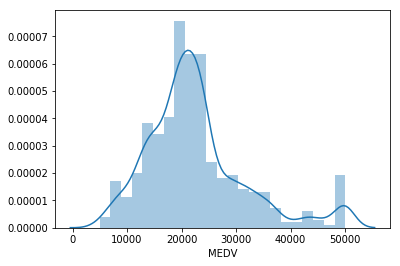

In [4]:
sns.distplot(b_df['MEDV']*1000)

The target variable, or response variable, is the median house value (MEDV). Let's see what features (or predictors) have any significant correlation with it.

Make heatmap with Seaborn. The DataFrame will be a correlation matrix sorted along the MEDV column.

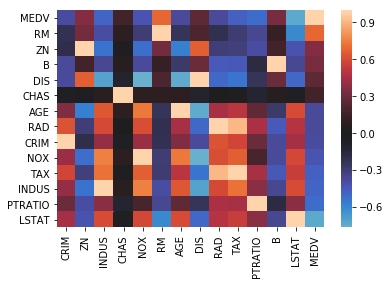

In [20]:
sns.heatmap(b_df.corr().sort_values(by=['MEDV'], ascending=False), center=0)

How informative! Notable positive correlations are number of rooms, large residential plots, and others. Strong negative correlations include a larger proportion of low economic status, a poor pupil-teacher ratio, a high amount of non-retail businesses, and others. Not all of these correlations are surprising, of course, but they may be predictive. Some of predictors may be correlated with each other, however, and that will be something to watch out for later.

## Training a Linear Regression Model

It's finally time to train (or fit) the model and see how it performs!

Your data must be split into two arrays, `X` and `y`. The `X` array contains the features that will train the model. The `y` array contains the target (or response) variable.

Scikit-Learn built-in datasets heavy already split the data, as mentioned near the beginning of thise notebook.

## `X` and `y` Arrays

Explicitly creating arrays is not necessary from a programming standpoint, but it looks cleaner mathematically.

In [6]:
X = boston.data
y = boston.target

## Train Test Split

You should split the data into training and testing sets. The model will be fit by using the training set and then evaluated with the testing set. Scikit-Learn includes tools to do this easily.

Setting `test_size=0.4` gives 40% of the data to the testing set and 60% to the training set. The purpose of `random_state=101` ensure a pseudo-random result that matches the course notebook.

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

Scikit-Learn makes this shockingly easy.

In [8]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

A `LinearRegression` object, in this case `lm` has a lot of interesting things inside.

In [9]:
lm.__dict__

{'_residues': 5506.526492883726,
 'coef_': array([ -7.75583711e-02,   4.20310157e-02,   9.11529473e-02,
          4.13304932e+00,  -1.99765575e+01,   2.89019042e+00,
          1.61533256e-02,  -1.26474745e+00,   2.60170760e-01,
         -1.11251993e-02,  -8.80555502e-01,   7.02445445e-03,
         -6.43482813e-01]),
 'copy_X': True,
 'fit_intercept': True,
 'intercept_': 41.281496544739696,
 'n_jobs': 1,
 'normalize': False,
 'rank_': 13,
 'singular_': array([  3.07524790e+03,   1.36150689e+03,   4.84134839e+02,
          2.66573446e+02,   1.26829300e+02,   9.03985446e+01,
          7.15193555e+01,   5.73912929e+01,   3.06663484e+01,
          1.88016997e+01,   8.51775105e+00,   4.03788883e+00,
          9.43831997e-01])}

## Evaluating the Model

Let's evaluate the model now and take a look at the coefficients.

In [10]:
lm.intercept_

41.281496544739696

In [11]:
coeff_df = pd.DataFrame(lm.coef_, boston.feature_names,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.077558
ZN,0.042031
INDUS,0.091153
CHAS,4.133049
NOX,-19.976557
RM,2.890190
AGE,0.016153
DIS,-1.264747
RAD,0.260171
TAX,-0.011125


How interesting! If any of these coefficients increase by a unit 1 of one, then MEDV will increase by a factor of that coefficient. Nitric oxide concentration is particular has a nefarious effect. However, that may be a side effect of living close to busy streets, which could be the real influence in that case.

## Predictions from the Model

Now that the model has already been fit, you can test the accuracy of its preditive power.

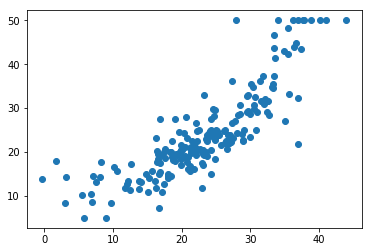

In [12]:
predictions = lm.predict(X_test)
plt.scatter(predictions, y_test)

Recall the the residuals are the difference between the predictions and the real responses.

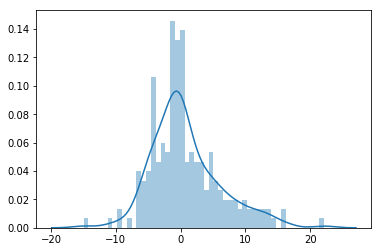

In [13]:
sns.distplot((y_test - predictions), bins=50)

The plot of the residuals is pretty normal-looking, which is a good thing. It shows that the model is not heavil biased. I think.

# Regression Evaluation Metrics

Here are three common evaluation metrics for regression problems. Do you hazily recall studying them intently? I think you could substitute the residual for error in any of these. Maybe.

**Mean absolutel error** (MAE) is the mean of the absolute values of the errors.

$$
\Large
\frac{1}{n}\sum_{i=1}^n|y_i-\hat{y}_i|
$$

**Mean squared error** (MSE) is the mean of the squared errors.

$$
\Large
\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2
$$

**Root mean squared error** (RMSE) is simply the square root of the above. The formatting breaks if I make this one bigger.

$$
\Large
\sqrt{\frac{1}{n}\sum_{i=1}^n(y_i-\hat{y}_i)^2}
$$


Comparing these metrics:

* **MAE** is the simplest to understand, for whatever that's worth.
* **MSE** is more widely-used because it "punishes" larger errors.
* **RMSE** is yet more widely-used because it is interpretable in "y" units. So Jose says.

They are all referred to as **loss functions**, meaning that you want to minimize them.

In [24]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 3.90132419321
MSE: 29.4126438124
RMSE: 5.42334249447
